# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df.shape

(962, 16)

In [6]:
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [8]:
df.duplicated().any()

False

### Check for NaN Values

In [9]:
df.isna().values.any()

True

In [10]:
df[df.isna().values]

year    category                               prize  \
1    1901  Literature  The Nobel Prize in Literature 1901   
1    1901  Literature  The Nobel Prize in Literature 1901   
1    1901  Literature  The Nobel Prize in Literature 1901   
3    1901       Peace          The Nobel Peace Prize 1901   
3    1901       Peace          The Nobel Peace Prize 1901   
..    ...         ...                                 ...   
958  2020       Peace          The Nobel Peace Prize 2020   
958  2020       Peace          The Nobel Peace Prize 2020   
958  2020       Peace          The Nobel Peace Prize 2020   
958  2020       Peace          The Nobel Peace Prize 2020   
958  2020       Peace          The Nobel Peace Prize 2020   

                                            motivation prize_share  \
1    "in special recognition of his poetic composit...         1/1   
1    "in special recognition of his poetic composit...         1/1   
1    "in special recognition of his poetic composit...         1/1   
3                                                  NaN         1/2   
3                                                  NaN         1/2   
..                                                 ...         ...   
958  “for its efforts to combat hunger, for its con...         1/1   
958  “for its efforts to combat hunger, for its con...         1/1   
958  “for its efforts to combat hunger, for its con...         1/1   
958  “for its efforts to combat hunger, for its con...         1/1   
958  “for its efforts to combat hunger, for its con...         1/1   

    laureate_type                   full_name  birth_date birth_city  \
1      Individual             Sully Prudhomme  1839-03-16      Paris   
1      Individual             Sully Prudhomme  1839-03-16      Paris   
1      Individual             Sully Prudhomme  1839-03-16      Paris   
3      Individual              Frédéric Passy  1822-05-20      Paris   
3      Individual              Frédéric Passy  1822-05-20      Paris   
..            ...                         ...         ...        ...   
958  Organization  World Food Programme (WFP)         NaN        NaN   
958  Organization  World Food Programme (WFP)         NaN        NaN   
958  Organization  World Food Programme (WFP)         NaN        NaN   
958  Organization  World Food Programme (WFP)         NaN        NaN   
958  Organization  World Food Programme (WFP)         NaN        NaN   

    birth_country birth_country_current   sex organization_name  \
1          France                France  Male               NaN   
1          France                France  Male               NaN   
1          France                France  Male               NaN   
3          France                France  Male               NaN   
3          France                France  Male               NaN   
..            ...                   ...   ...               ...   
958           NaN                   NaN   NaN               NaN   
958           NaN                   NaN   NaN               NaN   
958           NaN                   NaN   NaN               NaN   
958           NaN                   NaN   NaN               NaN   
958           NaN                   NaN   NaN               NaN   

    organization_city organization_country  ISO  
1                 NaN                  NaN  FRA  
1                 NaN                  NaN  FRA  
1                 NaN                  NaN  FRA  
3                 NaN                  NaN  FRA  
3                 NaN                  NaN  FRA  
..                ...                  ...  ...  
958               NaN                  NaN  NaN  
958               NaN                  NaN  NaN  
958               NaN                  NaN  NaN  
958               NaN                  NaN  NaN  
958               NaN                  NaN  NaN  

[1023 rows x 16 columns]

In [11]:
df.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [12]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df[df.birth_date.isna()][col_subset]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

In [13]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df.loc[df.organization_name.isna()][col_subset]

year    category laureate_type                           full_name  \
1    1901  Literature    Individual                     Sully Prudhomme   
3    1901       Peace    Individual                      Frédéric Passy   
4    1901       Peace    Individual                   Jean Henry Dunant   
7    1902  Literature    Individual  Christian Matthias Theodor Mommsen   
9    1902       Peace    Individual                Charles Albert Gobat   
..    ...         ...           ...                                 ...   
932  2018       Peace    Individual                         Nadia Murad   
942  2019  Literature    Individual                        Peter Handke   
946  2019       Peace    Individual                      Abiy Ahmed Ali   
954  2020  Literature    Individual                        Louise Glück   
958  2020       Peace  Organization          World Food Programme (WFP)   

    organization_name  
1                 NaN  
3                 NaN  
4                 NaN  
7                 NaN  
9                 NaN  
..                ...  
932               NaN  
942               NaN  
946               NaN  
954               NaN  
958               NaN  

[255 rows x 5 columns]

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

In [14]:
df.sample()

year category                       prize motivation prize_share  \
154  1930    Peace  The Nobel Peace Prize 1930        NaN         1/1   

    laureate_type                              full_name  birth_date  \
154    Individual  Lars Olof Jonathan (Nathan) Söderblom  1866-01-15   

    birth_city birth_country birth_country_current   sex organization_name  \
154      Trönö        Sweden                Sweden  Male               NaN   

    organization_city organization_country  ISO  
154               NaN                  NaN  SWE

#### Convert Year and Birth Date to Datetime

In [15]:
df['birth_date'] = pd.to_datetime(df.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [16]:
values = df.prize_share.astype(str).str.split('/',expand=True)

In [17]:
numerator = pd.to_numeric(values[0])
denominator = pd.to_numeric(values[1])

In [18]:
df['Percentage'] = numerator/denominator

In [19]:
df.sample()

year category                            prize  \
139  1927  Physics  The Nobel Prize in Physics 1927   

                                            motivation prize_share  \
139  "for his method of making the paths of electri...         1/2   

    laureate_type                    full_name birth_date birth_city  \
139    Individual  Charles Thomson Rees Wilson 1869-02-14  Glencorse   

    birth_country birth_country_current   sex        organization_name  \
139      Scotland        United Kingdom  Male  University of Cambridge   

    organization_city organization_country  ISO  Percentage  
139         Cambridge       United Kingdom  GBR        0.50

In [20]:
df['category'].value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [21]:
fig = px.pie(df,
             labels=df.sex.index,
             values=df.sex.value_counts().values,
             title="Percentage of Male vs. Female Winners",
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [22]:
df_women = df[df['sex']=='Female']
df_women.head(n=3)

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  Percentage  
18                  NaN  POL        0.25  
29                  NaN  CZE        1.00  
51                  NaN  SWE        1.00

In [23]:
df_women['prize'][:3]

18       The Nobel Prize in Physics 1903
29            The Nobel Peace Prize 1905
51    The Nobel Prize in Literature 1909
Name: prize, dtype: object

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [24]:
df[df.full_name.duplicated()]

year   category                              prize  \
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
215  1944      Peace         The Nobel Peace Prize 1944   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
62   "in recognition of her services to the advance...         1/1   
215                                                NaN         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
62     Individual                        Marie Curie, née Sklodowska   
215  Organization  Comité international de la Croix Rouge (Intern...   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
62  1867-11-07        Warsaw   Russian Empire (Poland)   
215        NaT           NaN                       NaN   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
62                     Poland  Female   
215                       NaN     NaN   
340  United States of America    Male   
348                       NaN     NaN   
424  United States of America    Male   
505            United Kingdom    Male   
523                       NaN     NaN   

                                organization_name organization_city  \
62                            Sorbonne University             Paris   
215                                           NaN               NaN   
340  California Institute of Technology (Caltech)      Pasadena, CA   
348                                           NaN               NaN   
424                        University of Illinois        Urbana, IL   
505           MRC Laboratory of Molecular Biology         Cambridge   
523                                           NaN               NaN   

         organization_country  ISO  Percentage  
62                     France  POL        1.00  
215                       NaN  NaN        1.00  
340  United States of America  USA        1.00  
348                       NaN  NaN        0.50  
424  United States of America  USA        0.33  
505            United Kingdom  GBR        0.25  
523                       NaN  NaN        1.00

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [25]:
df.category.nunique()

6

In [26]:
p_df = df.category.value_counts()
p_df

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [293]:
graph = px.bar(data_frame=p_df,
      x=p_df.index,
      y=p_df.values,
      color = p_df.values,
      color_continuous_scale='Aggrnyl',
      title='Number of Prizes Awarded per Category')

graph.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=True,
                    yaxis_title='Number of Prizes')

graph.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [28]:
df[df['category']=='Economics'].sort_values('year')[:4]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
411  1971  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   
411  "for his empirically founded interpretation of...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   
411    Individual      Simon Kuznets 1901-04-30      Pinsk   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   
411  Russian Empire (Belarus)                   Belarus  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   
411                           Harvard University     Cambridge, MA   

         organization_country  ISO  Percentage  
393               Netherlands  NLD        0.50  
394                    Norway  NOR        0.50  
402  United States of America  USA        1.00  
411  United States of America  BLR        1.00

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [29]:
new_df = df.groupby(['category','sex'], as_index=False).agg({'prize':pd.Series.count})
new_df.sort_values('prize',ascending=False,inplace=True)
new_df

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [30]:
bar_split = px.bar(data_frame=new_df,
      x=new_df.category,
      y=new_df.prize.values,
      title="Number of Prizes Awarded Per category split by Men and Women",
      color=new_df.sex)

bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [299]:
df.groupby('year').count()['prize']

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [301]:
prize_per_year = df.groupby('year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [32]:
rolling_graph = prize_per_year.rolling(window=5).mean()
rolling_graph

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

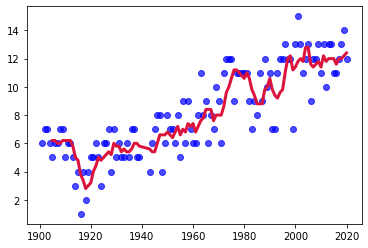

In [33]:
plt.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            color='blue',
            alpha=0.7)
plt.plot(prize_per_year.index,
        rolling_graph.values,
        c='crimson',
        linewidth=3)

In [34]:
year_array = np.arange(1900,2020,5)

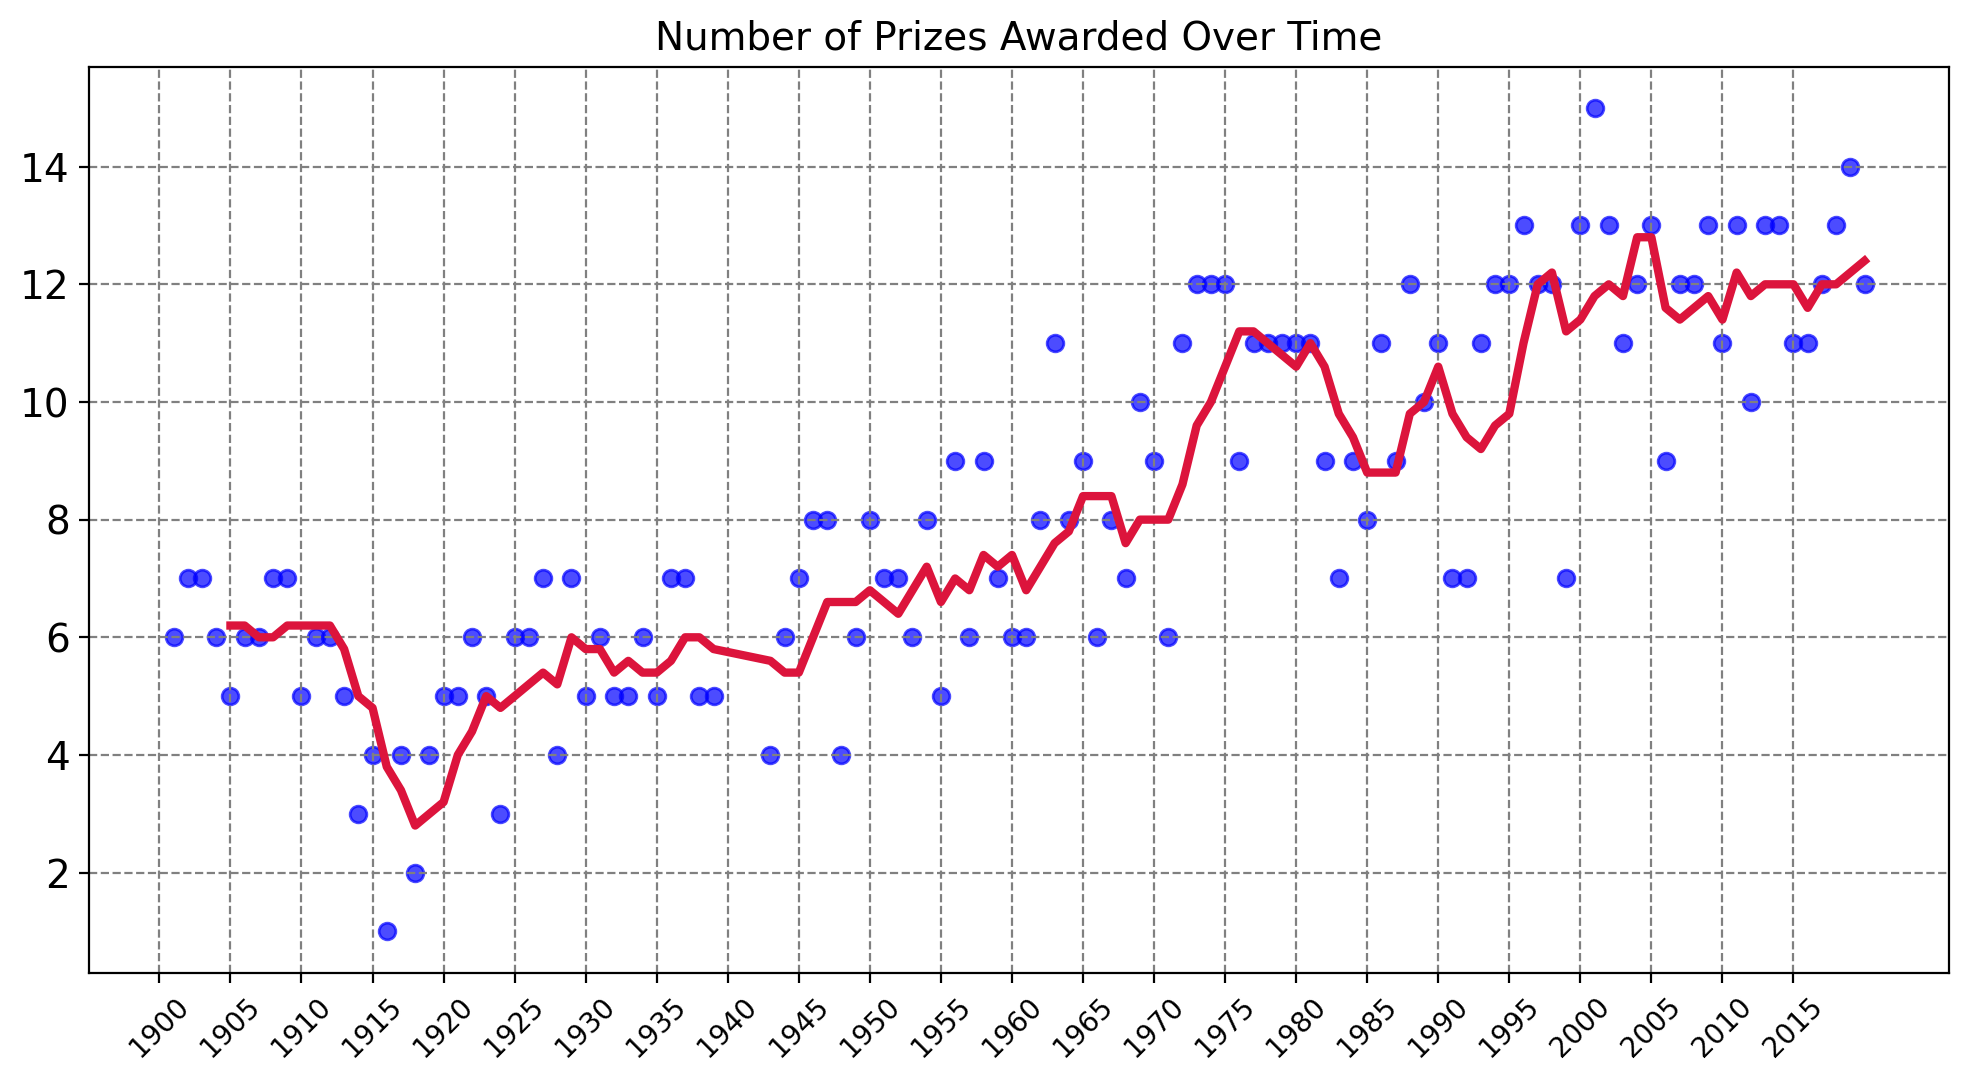

In [35]:
plt.figure(figsize=(12,6), dpi=200)
plt.title('Number of Prizes Awarded Over Time', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(ticks=year_array, rotation=45)
plt.grid(color='gray', linestyle='--')

ax=plt.gca()
ax.scatter(x=prize_per_year.index,
          y=prize_per_year.values,
          color='blue',
          alpha=0.7)
ax.plot(prize_per_year.index,
       rolling_graph.values,
       c='crimson',
       linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [36]:
df.sample()

year  category                                           prize  \
373  1966  Medicine  The Nobel Prize in Physiology or Medicine 1966   

                                            motivation prize_share  \
373  "for his discoveries concerning hormonal treat...         1/2   

    laureate_type                full_name birth_date birth_city  \
373    Individual  Charles Brenton Huggins 1901-09-22    Halifax   

    birth_country birth_country_current   sex      organization_name  \
373        Canada                Canada  Male  University of Chicago   

    organization_city      organization_country  ISO  Percentage  
373       Chicago, IL  United States of America  CAN        0.50

In [37]:
percentage_per_year = df.groupby('year').agg({'Percentage': pd.Series.mean})
percentage_per_year

Percentage
year            
1901        0.83
1902        0.71
1903        0.71
1904        0.83
1905        1.00
...          ...
2016        0.55
2017        0.50
2018        0.46
2019        0.43
2020        0.50

[117 rows x 1 columns]

In [38]:
roll_avg = percentage_per_year.rolling(window=5).mean()
roll_avg

Percentage
year            
1901         NaN
1902         NaN
1903         NaN
1904         NaN
1905        0.82
...          ...
2016        0.52
2017        0.50
2018        0.50
2019        0.50
2020        0.49

[117 rows x 1 columns]

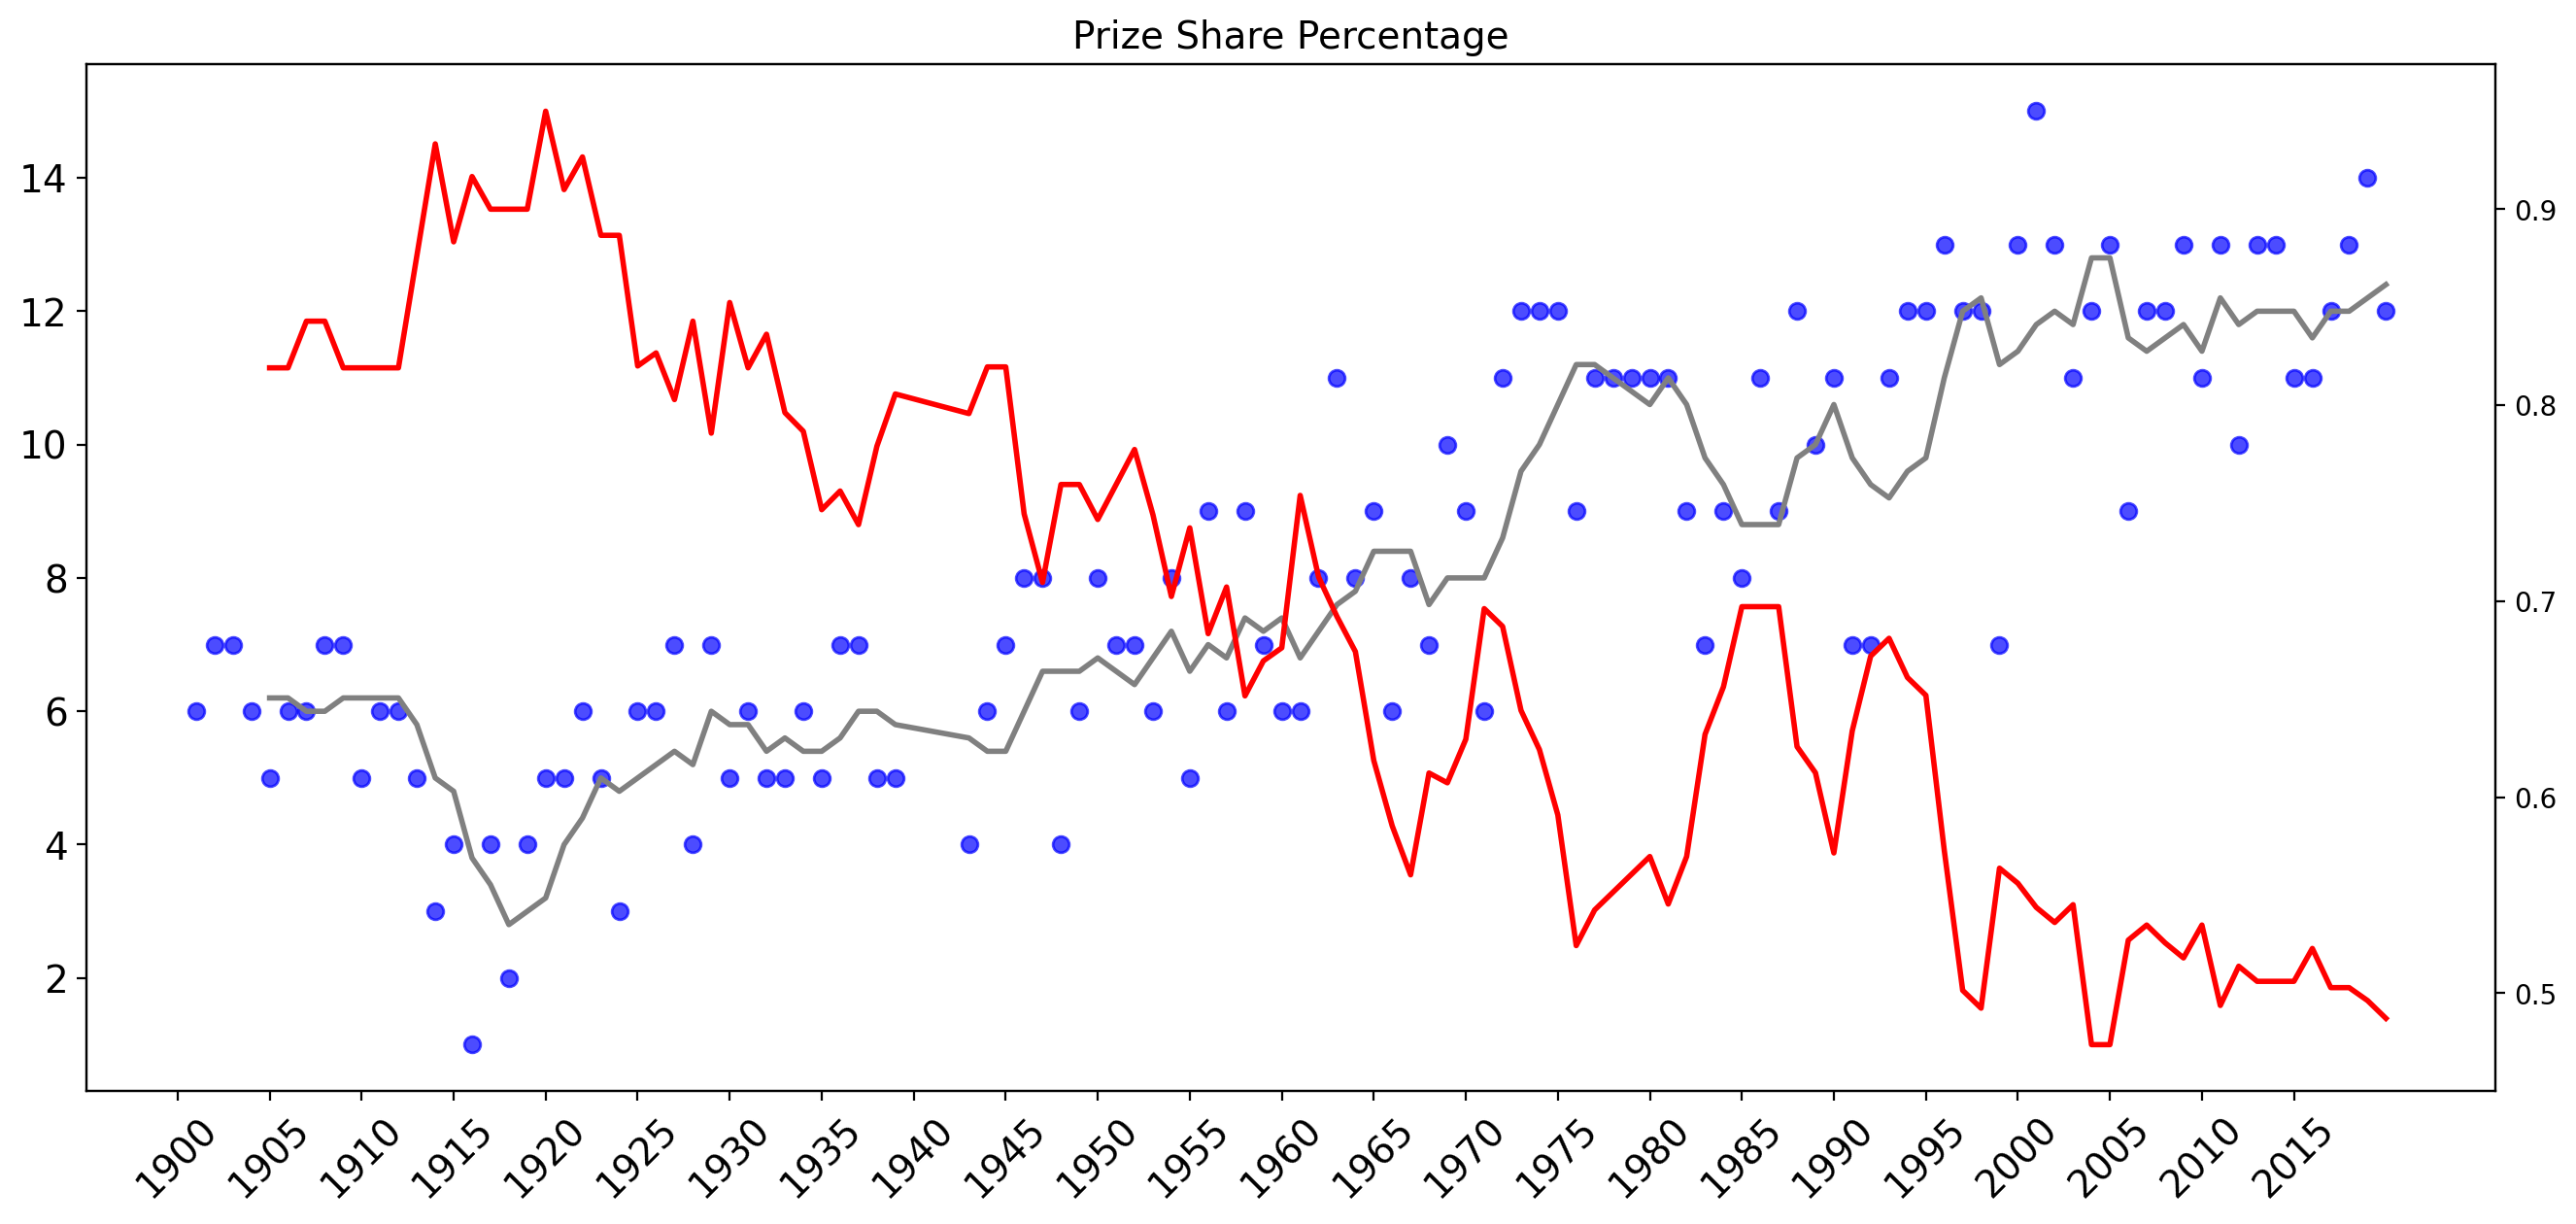

In [39]:
plt.figure(figsize=(16,7), dpi=200)
plt.title('Prize Share Percentage', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(ticks=year_array, fontsize=14, rotation=45)

ax1=plt.gca()
ax2 = ax1.twinx()

ax1.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            color='blue',
            alpha=0.7)

ax1.plot(prize_per_year.index,
         rolling_graph.values,
         c='gray',
         linewidth=2)


ax2.plot(prize_per_year.index,
         roll_avg.values,
         c='red',
         linewidth=2)

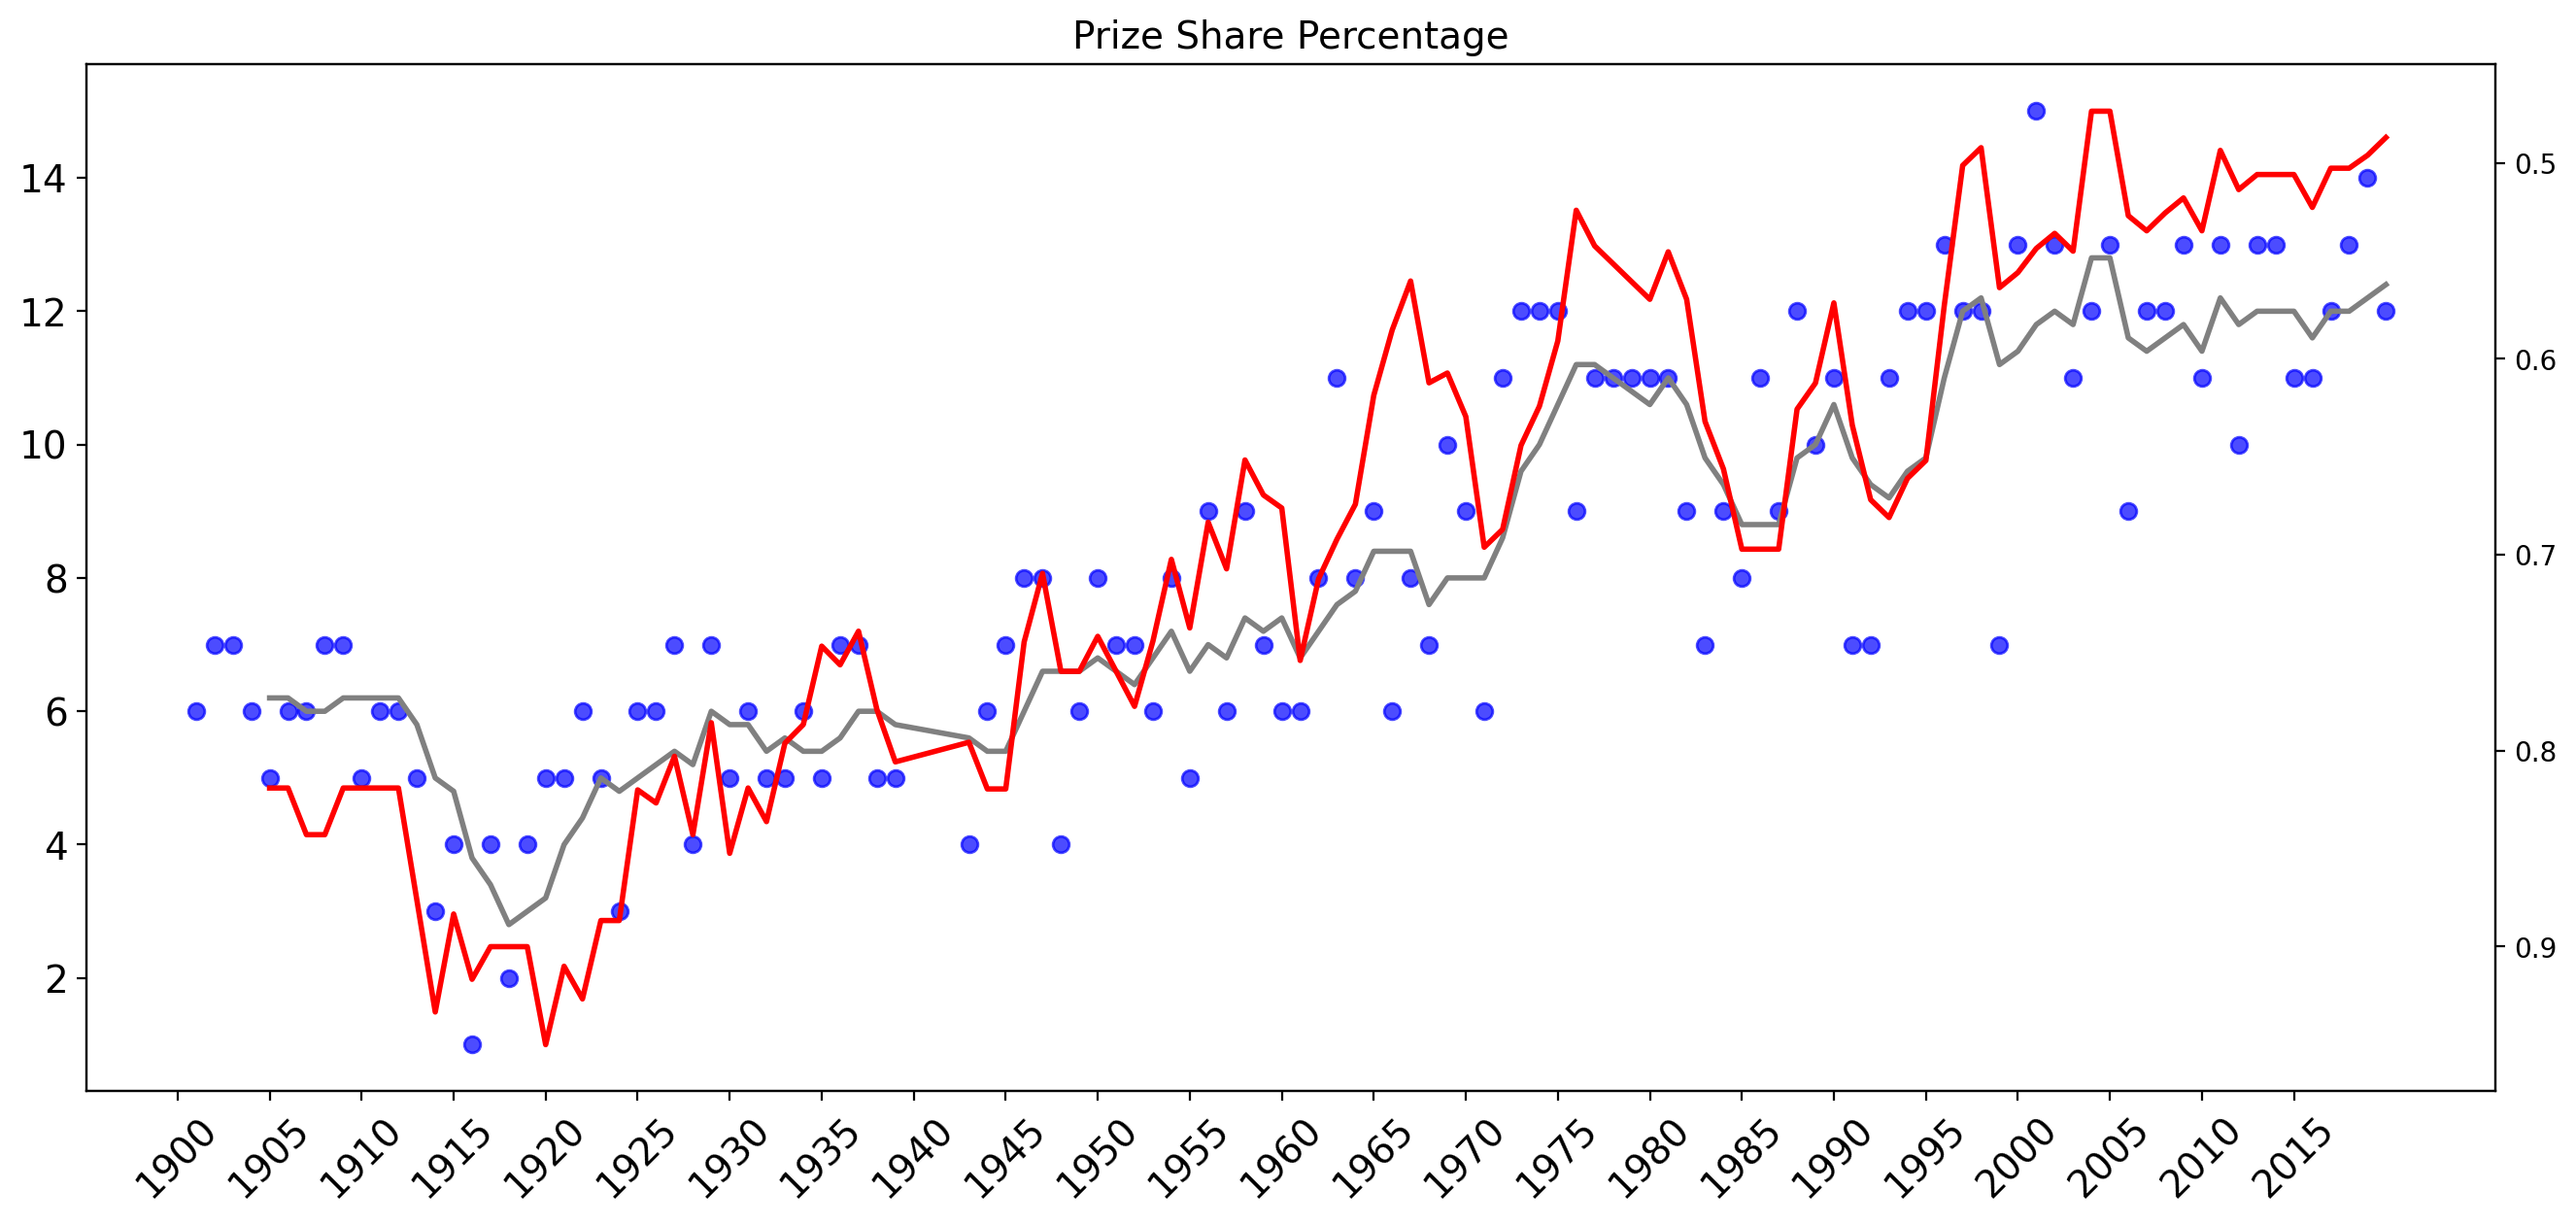

In [40]:
plt.figure(figsize=(16,7), dpi=200)
plt.title('Prize Share Percentage', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(ticks=year_array, fontsize=14, rotation=45)

ax1=plt.gca()
ax2 = ax1.twinx()

ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            color='blue',
            alpha=0.7)

ax1.plot(prize_per_year.index,
         rolling_graph.values,
         c='gray',
         linewidth=2)


ax2.plot(prize_per_year.index,
         roll_avg.values,
         c='red',
         linewidth=2)

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [41]:
df.tail()

year  category                                           prize  \
957  2020  Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020     Peace                      The Nobel Peace Prize 2020   
959  2020   Physics                 The Nobel Prize in Physics 2020   
960  2020   Physics                 The Nobel Prize in Physics 2020   
961  2020   Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                   full_name birth_date  \
957    Individual            Michael Houghton 1949-07-02   
958  Organization  World Food Programme (WFP)        NaT   
959    Individual                 Andrea Ghez 1965-06-16   
960    Individual             Reinhard Genzel 1952-03-24   
961    Individual               Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      organization_country  ISO  Percentage  
957          Edmonton                    Canada  GBR        0.33  
958               NaN                       NaN  NaN        1.00  
959      Berkeley, CA  United States of America  USA        0.25  
960   Los Angeles, CA  United States of America  DEU        0.25  
961            Oxford            United Kingdom  GBR        0.50

In [42]:
top_countries = df.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count})
top_countries

birth_country_current  prize
0                    Algeria      2
1                  Argentina      4
2                  Australia     10
3                    Austria     18
4                 Azerbaijan      1
..                       ...    ...
74  United States of America    281
75                 Venezuela      1
76                   Vietnam      1
77                     Yemen      1
78                  Zimbabwe      1

[79 rows x 2 columns]

In [43]:
top_countries.sort_values(by='prize', ascending=False, inplace=True)

In [44]:
top_countries= top_countries[:20]

In [45]:
bar = px.bar(x=top_countries.prize,
             y=top_countries.birth_country_current,
             orientation='h',
             color=top_countries.prize,
             color_continuous_scale='Viridis',
             title='The Countries with the Most Nobel Prizes')

bar.update_layout(xaxis_title="No. of Prizes",
                  yaxis_title='Counrty',
                  coloraxis_showscale=False)

bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [46]:
df.sample()

year   category                              prize  \
890  2015  Chemistry  The Nobel Prize in Chemistry 2015   

                                  motivation prize_share laureate_type  \
890  "for mechanistic studies of DNA repair"         1/3    Individual   

        full_name birth_date birth_city             birth_country  \
890  Paul Modrich 1946-06-13  Raton, NM  United States of America   

        birth_country_current   sex                organization_name  \
890  United States of America  Male  Howard Hughes Medical Institute   

    organization_city      organization_country  ISO  Percentage  
890        Durham, NC  United States of America  USA        0.33

In [47]:
df_countries = df.groupby(['birth_country_current', 'ISO'],as_index=False).agg({'prize':pd.Series.count})
df_countries

birth_country_current  ISO  prize
0                    Algeria  DZA      2
1                  Argentina  ARG      4
2                  Australia  AUS     10
3                    Austria  AUT     18
4                 Azerbaijan  AZE      1
..                       ...  ...    ...
74  United States of America  USA    281
75                 Venezuela  VEN      1
76                   Vietnam  VNM      1
77                     Yemen  YEM      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [61]:
world_map = px.choropleth(df_countries,
                         locations='ISO',
                          color='prize',
                         hover_name='birth_country_current',
                         color_continuous_scale='matter')

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [62]:
df.sample()

year category                       prize  \
825  2009    Peace  The Nobel Peace Prize 2009   

                                            motivation prize_share  \
825  "for his extraordinary efforts to strengthen i...         1/1   

    laureate_type        full_name birth_date    birth_city  \
825    Individual  Barack H. Obama 1961-08-04  Honolulu, HI   

                birth_country     birth_country_current   sex  \
825  United States of America  United States of America  Male   

    organization_name organization_city organization_country  ISO  Percentage  
825               NaN               NaN                  NaN  USA        1.00

In [108]:
cat_country = df.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
cat_country

birth_country_current    category  prize
0                     Algeria  Literature      1
1                     Algeria     Physics      1
2                   Argentina    Medicine      2
3                   Argentina       Peace      2
4                   Australia   Chemistry      1
..                        ...         ...    ...
206  United States of America     Physics     70
207                 Venezuela    Medicine      1
208                   Vietnam       Peace      1
209                     Yemen       Peace      1
210                  Zimbabwe       Peace      1

[211 rows x 3 columns]

In [109]:
xyz = cat_country.groupby('birth_country_current', as_index=False).agg({'prize':pd.Series.sum})

In [111]:
merged_df = pd.merge(cat_country, xyz, on='birth_country_current')
merged_df.columns=['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', ascending=False, inplace=True)
merged_df= merged_df[:60]
merged_df

birth_country_current    category  cat_prize  total_prize
204  United States of America    Medicine         78          281
203  United States of America  Literature         10          281
201  United States of America   Chemistry         55          281
205  United States of America       Peace         19          281
206  United States of America     Physics         70          281
202  United States of America   Economics         49          281
199            United Kingdom       Peace         11          105
198            United Kingdom    Medicine         28          105
197            United Kingdom  Literature          7          105
196            United Kingdom   Economics          8          105
195            United Kingdom   Chemistry         27          105
200            United Kingdom     Physics         24          105
76                    Germany     Physics         26           84
75                    Germany       Peace          5           84
74                    Germany    Medicine         18           84
73                    Germany  Literature          8           84
72                    Germany   Economics          1           84
71                    Germany   Chemistry         26           84
65                     France   Chemistry         10           57
70                     France     Physics         10           57
69                     France       Peace         10           57
68                     France    Medicine         12           57
66                     France   Economics          4           57
67                     France  Literature         11           57
182                    Sweden     Physics          4           29
181                    Sweden       Peace          5           29
180                    Sweden    Medicine          7           29
178                    Sweden   Economics          2           29
177                    Sweden   Chemistry          4           29
179                    Sweden  Literature          7           29
153                    Poland     Physics          8           27
152                    Poland       Peace          2           27
151                    Poland    Medicine          6           27
150                    Poland  Literature          6           27
149                    Poland   Economics          1           27
148                    Poland   Chemistry          4           27
114                     Japan     Physics         11           27
113                     Japan       Peace          1           27
112                     Japan    Medicine          5           27
111                     Japan  Literature          3           27
110                     Japan   Chemistry          7           27
165                    Russia       Peace          2           26
166                    Russia     Physics         10           26
164                    Russia    Medicine          2           26
163                    Russia  Literature          5           26
162                    Russia   Economics          3           26
161                    Russia   Chemistry          4           26
31                     Canada       Peace          1           20
32                     Canada     Physics          6           20
30                     Canada    Medicine          4           20
29                     Canada  Literature          2           20
28                     Canada   Economics          3           20
27                     Canada   Chemistry          4           20
184               Switzerland  Literature          1           19
185               Switzerland    Medicine          6           19
183               Switzerland   Chemistry          3           19
187               Switzerland     Physics          6           19
104                     Italy   Chemistry          1           19
106                     Italy  Literature          6           19
107                     Italy    Medicine       

In [112]:
br= px.bar(data_frame=merged_df,
       x='total_prize',
       y='birth_country_current',
       orientation='h',
       color=merged_df.category)

br.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')

br.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [113]:
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  Percentage  
0            Berlin              Germany  NLD        1.00  
1               NaN                  NaN  FRA        1.00  
2           Marburg              Germany  POL        1.00  
3               NaN                  NaN  FRA        0.50  
4               NaN                  NaN  CHE        0.50

In [119]:
prize_by_year = df.groupby(['birth_country_current','year'], as_index=False).count()
prize_by_year= prize_by_year.sort_values(by='prize')[['birth_country_current','year','prize']]
prize_by_year

birth_country_current  year  prize
0                     Algeria  1957      1
359                    Poland  1954      1
357                    Poland  1944      1
356                    Poland  1943      1
355                    Poland  1939      1
..                        ...   ...    ...
622  United States of America  2020      7
596  United States of America  1993      7
577  United States of America  1972      8
594  United States of America  1990      8
603  United States of America  2001      8

[627 rows x 3 columns]

In [126]:
cumulatice_prizes = prize_by_year.groupby(['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cumulatice_prizes.reset_index(inplace=True)
cumulatice_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [128]:
gh = px.line(data_frame=cumulatice_prizes,
               x='year', y='prize',
               color='birth_country_current',
               hover_name='birth_country_current')
gh.update_layout(xaxis_title='Year', yaxis_title='Prize')
gh.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [129]:
df.sample()

year  category                                           prize  \
644  1994  Medicine  The Nobel Prize in Physiology or Medicine 1994   

                                            motivation prize_share  \
644  "for their discovery of G-proteins and the rol...         1/2   

    laureate_type       full_name birth_date     birth_city  \
644    Individual  Martin Rodbell 1925-12-01  Baltimore, MD   

                birth_country     birth_country_current   sex  \
644  United States of America  United States of America  Male   

                                     organization_name  \
644  National Institute of Environmental Health Sci...   

              organization_city      organization_country  ISO  Percentage  
644  Research Triangle Park, NC  United States of America  USA        0.50

In [153]:
organization_df = df.groupby('organization_name', as_index=False).agg({'prize':pd.Series.count})
organization_df.sort_values(by='prize', inplace=True, ascending=False)
organization_df= organization_df[:20]
organization_df

organization_name  prize
196                      University of California     40
68                             Harvard University     29
167                           Stanford University     23
117   Massachusetts Institute of Technology (MIT)     21
198                         University of Chicago     20
197                       University of Cambridge     18
26   California Institute of Technology (Caltech)     17
38                            Columbia University     17
146                          Princeton University     15
152                        Rockefeller University     13
119                           Max-Planck-Institut     13
222                          University of Oxford     12
111           MRC Laboratory of Molecular Biology     10
258                               Yale University      9
40                             Cornell University      8
12                              Bell Laboratories      8
109                             London University      7
163                           Sorbonne University      7
67                         Harvard Medical School      7
192                     University College London      7

In [155]:
org_graph= px.bar(data_frame=organization_df,
       x='prize',
       y='organization_name',
       orientation='h',
       color=organization_df.prize,
       color_continuous_scale='Viridis')

org_graph.update_layout(xaxis_title="Prizes", yaxis_title="Organization Name", showlegend=False)

org_graph.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [165]:
df.sample()

year    category                               prize  \
538  1983  Literature  The Nobel Prize in Literature 1983   

                                            motivation prize_share  \
538  "for his novels which, with the perspicuity of...         1/1   

    laureate_type        full_name birth_date        birth_city  \
538    Individual  William Golding 1911-09-19  St. Columb Minor   

      birth_country birth_country_current   sex organization_name  \
538  United Kingdom        United Kingdom  Male               NaN   

    organization_city organization_country  ISO  Percentage  
538               NaN                  NaN  GBR        1.00

In [170]:
city_df = df.organization_city.value_counts()
city_df= city_df[:20]
city_df

Cambridge, MA      50
New York, NY       45
Cambridge          31
London             27
Paris              25
Stanford, CA       24
Berkeley, CA       21
Chicago, IL        20
Princeton, NJ      19
Pasadena, CA       17
Oxford             12
Berlin             12
Stockholm          10
Moscow             10
Munich              9
Boston, MA          9
Heidelberg          9
New Haven, CT       9
Los Angeles, CA     8
Ithaca, NY          8
Name: organization_city, dtype: int64

In [171]:
city_graph = px.bar(city_df,
                   x=city_df.index, y=city_df.values,
                   color=city_df.values,
                   color_continuous_scale='Viridis',
                   title='Which Cities Do the Most Research?')

city_graph.update_layout(xaxis_title="City Name", yaxis_title="Counts")

city_graph.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [172]:
df.sample()

year   category                                              prize  \
914  2017  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                           motivation prize_share  \
914  “for his contributions to behavioural economics”         1/1   

    laureate_type          full_name birth_date       birth_city  \
914    Individual  Richard H. Thaler 1945-09-12  East Orange, NJ   

                birth_country     birth_country_current   sex  \
914  United States of America  United States of America  Male   

         organization_name organization_city      organization_country  ISO  \
914  University of Chicago       Chicago, IL  United States of America  USA   

     Percentage  
914        1.00

In [180]:
birth_city_df = df.birth_city.value_counts()[:20]
birth_city_df

New York, NY             53
Paris                    26
London                   19
Vienna                   14
Chicago, IL              12
Berlin                   11
Washington, DC            8
Brooklyn, NY              8
Boston, MA                8
Budapest                  8
Munich                    7
Moscow                    7
Stockholm                 6
Hamburg                   6
Frankfurt-on-the-Main     5
Prague                    5
Cairo                     4
Montreal                  4
Pittsburgh, PA            4
Ann Arbor, MI             3
Name: birth_city, dtype: int64

In [176]:
birth_city_graph = px.bar(data_frame=birth_city_df,
                         x=birth_city_df.values,
                         y=birth_city_df.index,
                         orientation='h',
                         color=birth_city_df.values,
                         color_continuous_scale='Plasma')

birth_city_graph.update_layout(xaxis_title='Count', yaxis_title='City Names')

birth_city_graph.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [192]:
df.sample()

year category                       prize motivation prize_share  \
177  1934    Peace  The Nobel Peace Prize 1934        NaN         1/1   

    laureate_type         full_name birth_date birth_city birth_country  \
177    Individual  Arthur Henderson 1863-09-13    Glasgow      Scotland   

    birth_country_current   sex organization_name organization_city  \
177        United Kingdom  Male               NaN               NaN   

    organization_country  ISO  Percentage  
177                  NaN  GBR        1.00

In [198]:
country_city_org_df = df.groupby(['organization_country','organization_city','organization_name'], as_index=False).agg({'prize':pd.Series.count})
country_city_org_df.sort_values('prize', ascending=False, inplace=True)
country_city_org_df

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [204]:
country_city_org_graph = px.sunburst(data_frame=country_city_org_df,
                                     path=['organization_country', 'organization_city', 'organization_name'],
                                     values='prize',
                                     title="Sunburst Graph",
                                    color='prize',
                                     color_continuous_scale='RdBu')

country_city_org_graph.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City')

country_city_org_graph.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [216]:
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  Percentage  
0            Berlin              Germany  NLD        1.00  
1               NaN                  NaN  FRA        1.00  
2           Marburg              Germany  POL        1.00  
3               NaN                  NaN  FRA        0.50  
4               NaN                  NaN  CHE        0.50

In [242]:
year_age= df['year']-df['birth_date'].dt.year
year_age

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Length: 962, dtype: float64

In [246]:
df['winning_age'] = year_age.values
df

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      o

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [248]:
df.sort_values('winning_age', ascending=True).head(n=1)

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  Percentage  winning_age  
885                  NaN  PAK        0.50        17.00

In [250]:
df.winning_age.mean()

59.94860813704497

In [252]:
df.describe()

year  Percentage  winning_age
count   962.00      962.00       934.00
mean  1,971.82        0.63        59.95
std      33.81        0.29        12.62
min   1,901.00        0.25        17.00
25%   1,948.00        0.33        51.00
50%   1,977.00        0.50        60.00
75%   2,001.00        1.00        69.00
max   2,020.00        1.00        97.00

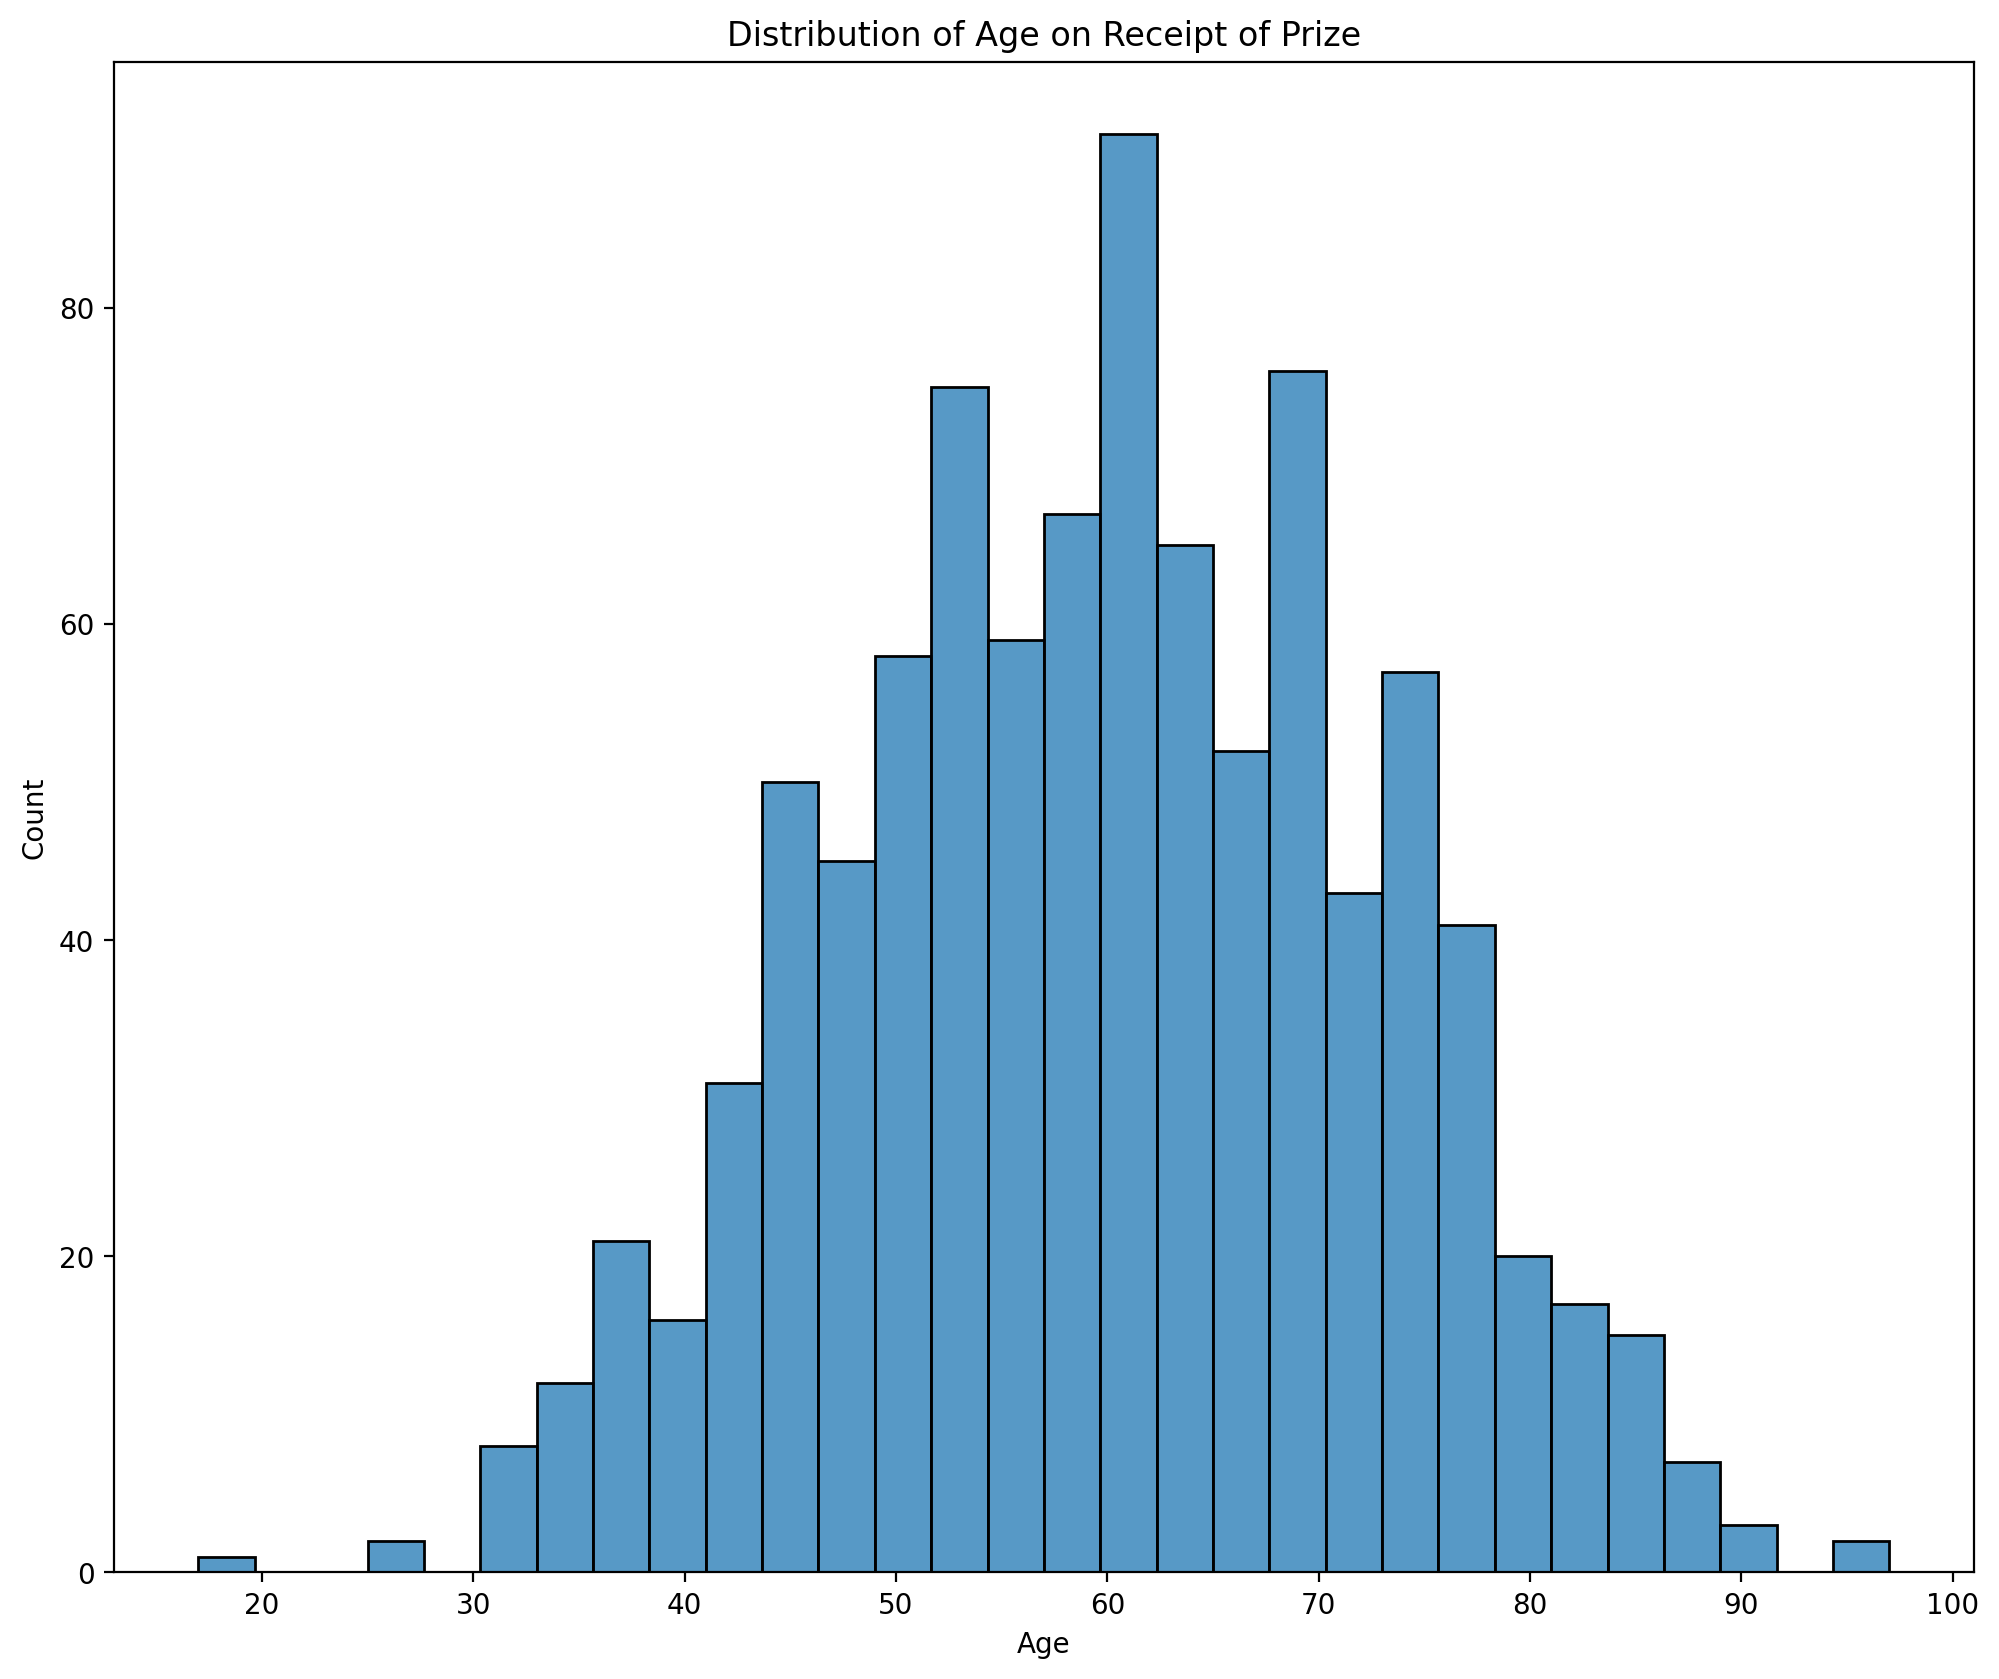

In [260]:
plt.figure(figsize=(12,10), dpi=200)
sns.histplot(data=df,
             x=df.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


In [262]:
df.sample()

year  category                                           prize  \
566  1986  Medicine  The Nobel Prize in Physiology or Medicine 1986   

                                    motivation prize_share laureate_type  \
566  "for their discoveries of growth factors"         1/2    Individual   

         full_name birth_date    birth_city             birth_country  \
566  Stanley Cohen 1922-11-17  Brooklyn, NY  United States of America   

        birth_country_current   sex      organization_name organization_city  \
566  United States of America  Male  Vanderbilt University     Nashville, TN   

         organization_country  ISO  Percentage  winning_age  
566  United States of America  USA        0.50        64.00

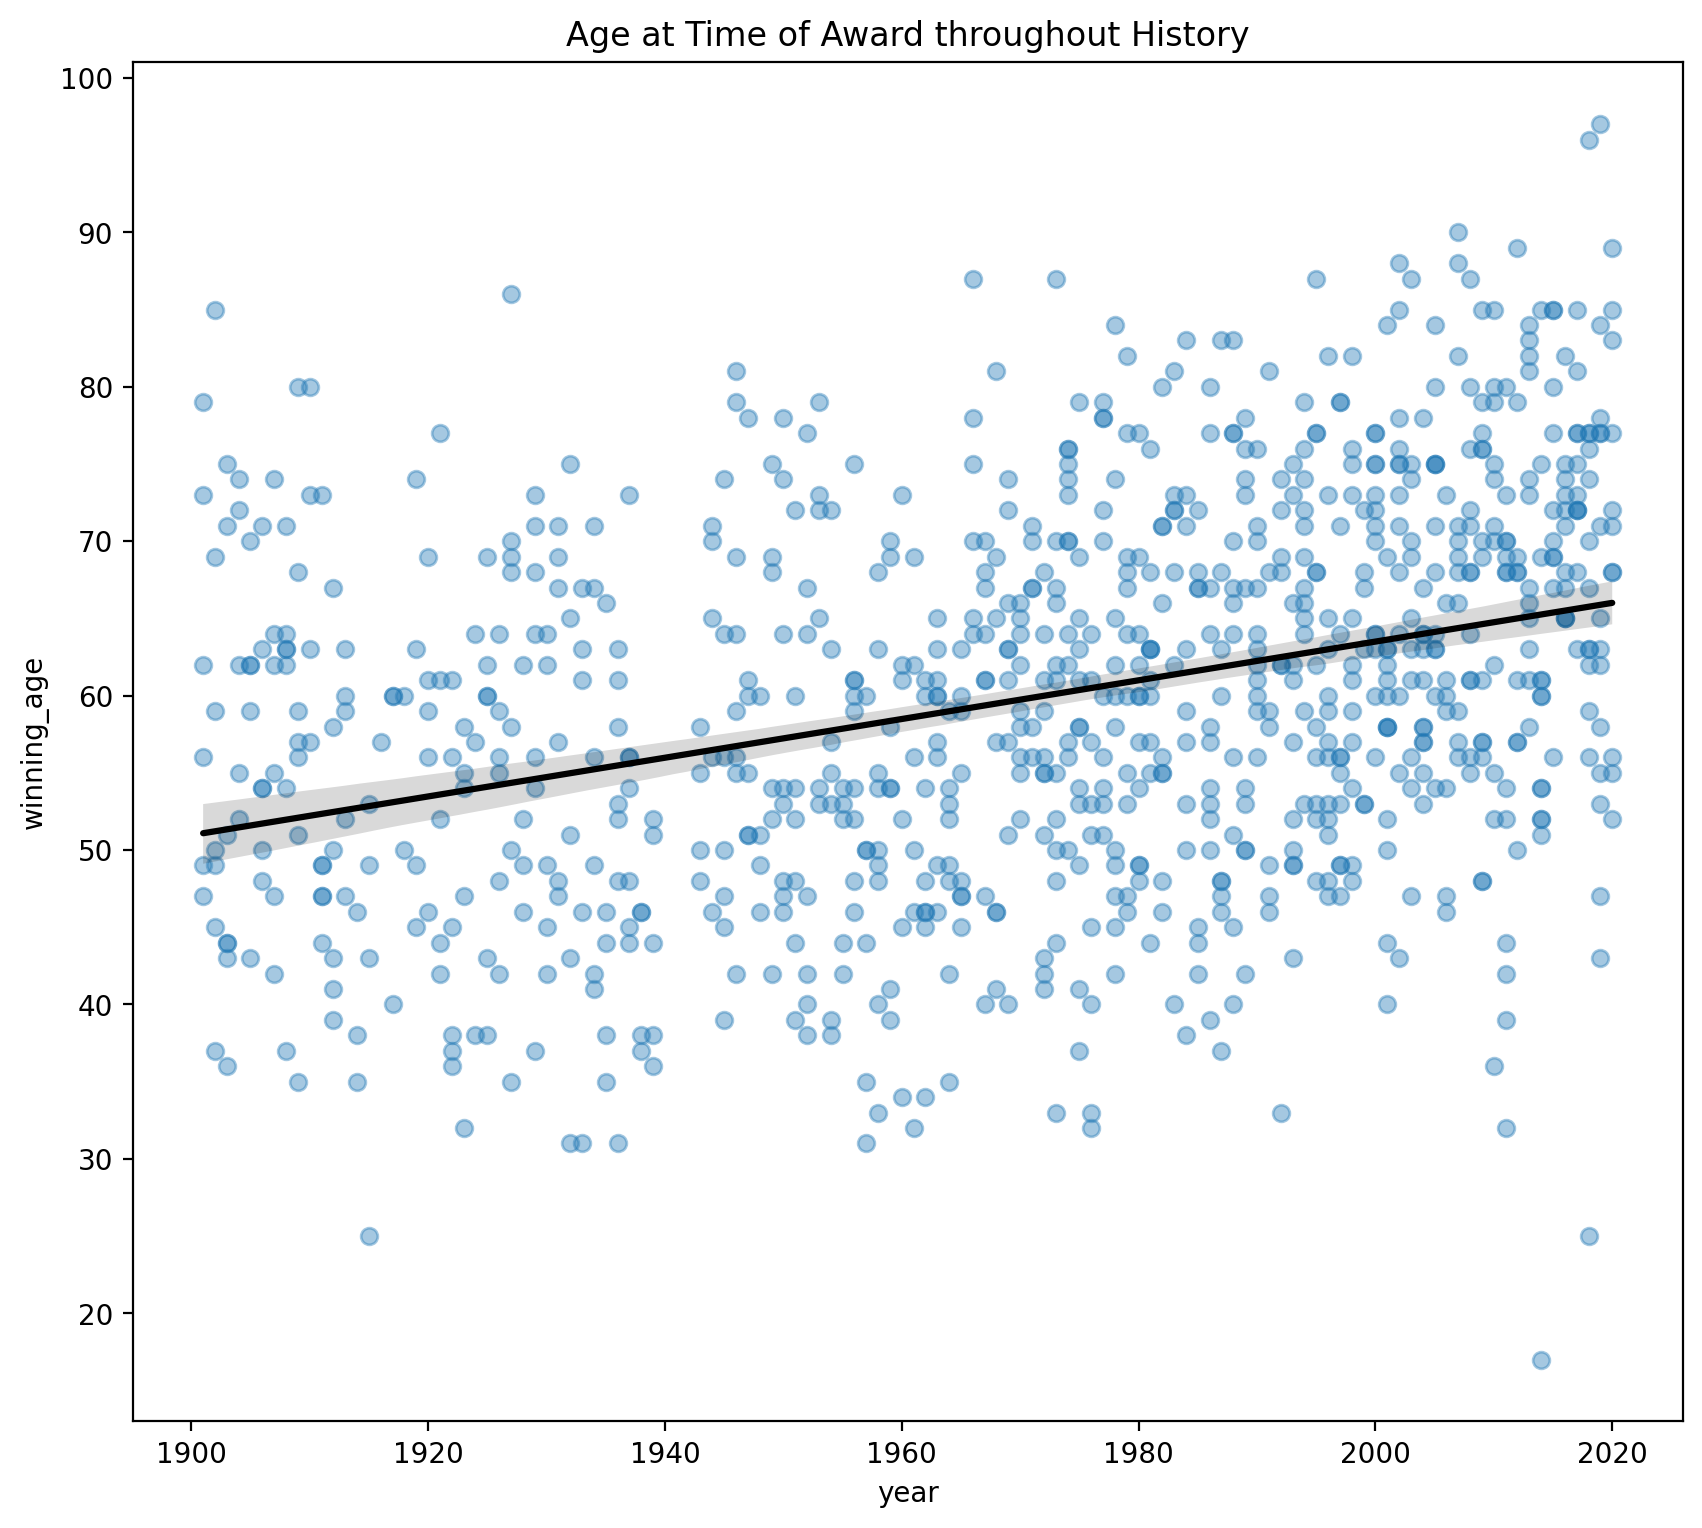

In [270]:
plt.figure(figsize=(10,9), dpi=200)
plt.title("Age at Time of Award throughout History")

with sns.axes_style("darkgrid"):
    sns.regplot(data=df,
                y='winning_age',
                x='year',
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [273]:
df.sample()

year   category                              prize  \
439  1974  Chemistry  The Nobel Prize in Chemistry 1974   

                                            motivation prize_share  \
439  "for his fundamental achievements, both theore...         1/1   

    laureate_type      full_name birth_date    birth_city  \
439    Individual  Paul J. Flory 1910-06-19  Sterling, IL   

                birth_country     birth_country_current   sex  \
439  United States of America  United States of America  Male   

       organization_name organization_city      organization_country  ISO  \
439  Stanford University      Stanford, CA  United States of America  USA   

     Percentage  winning_age  
439        1.00        64.00

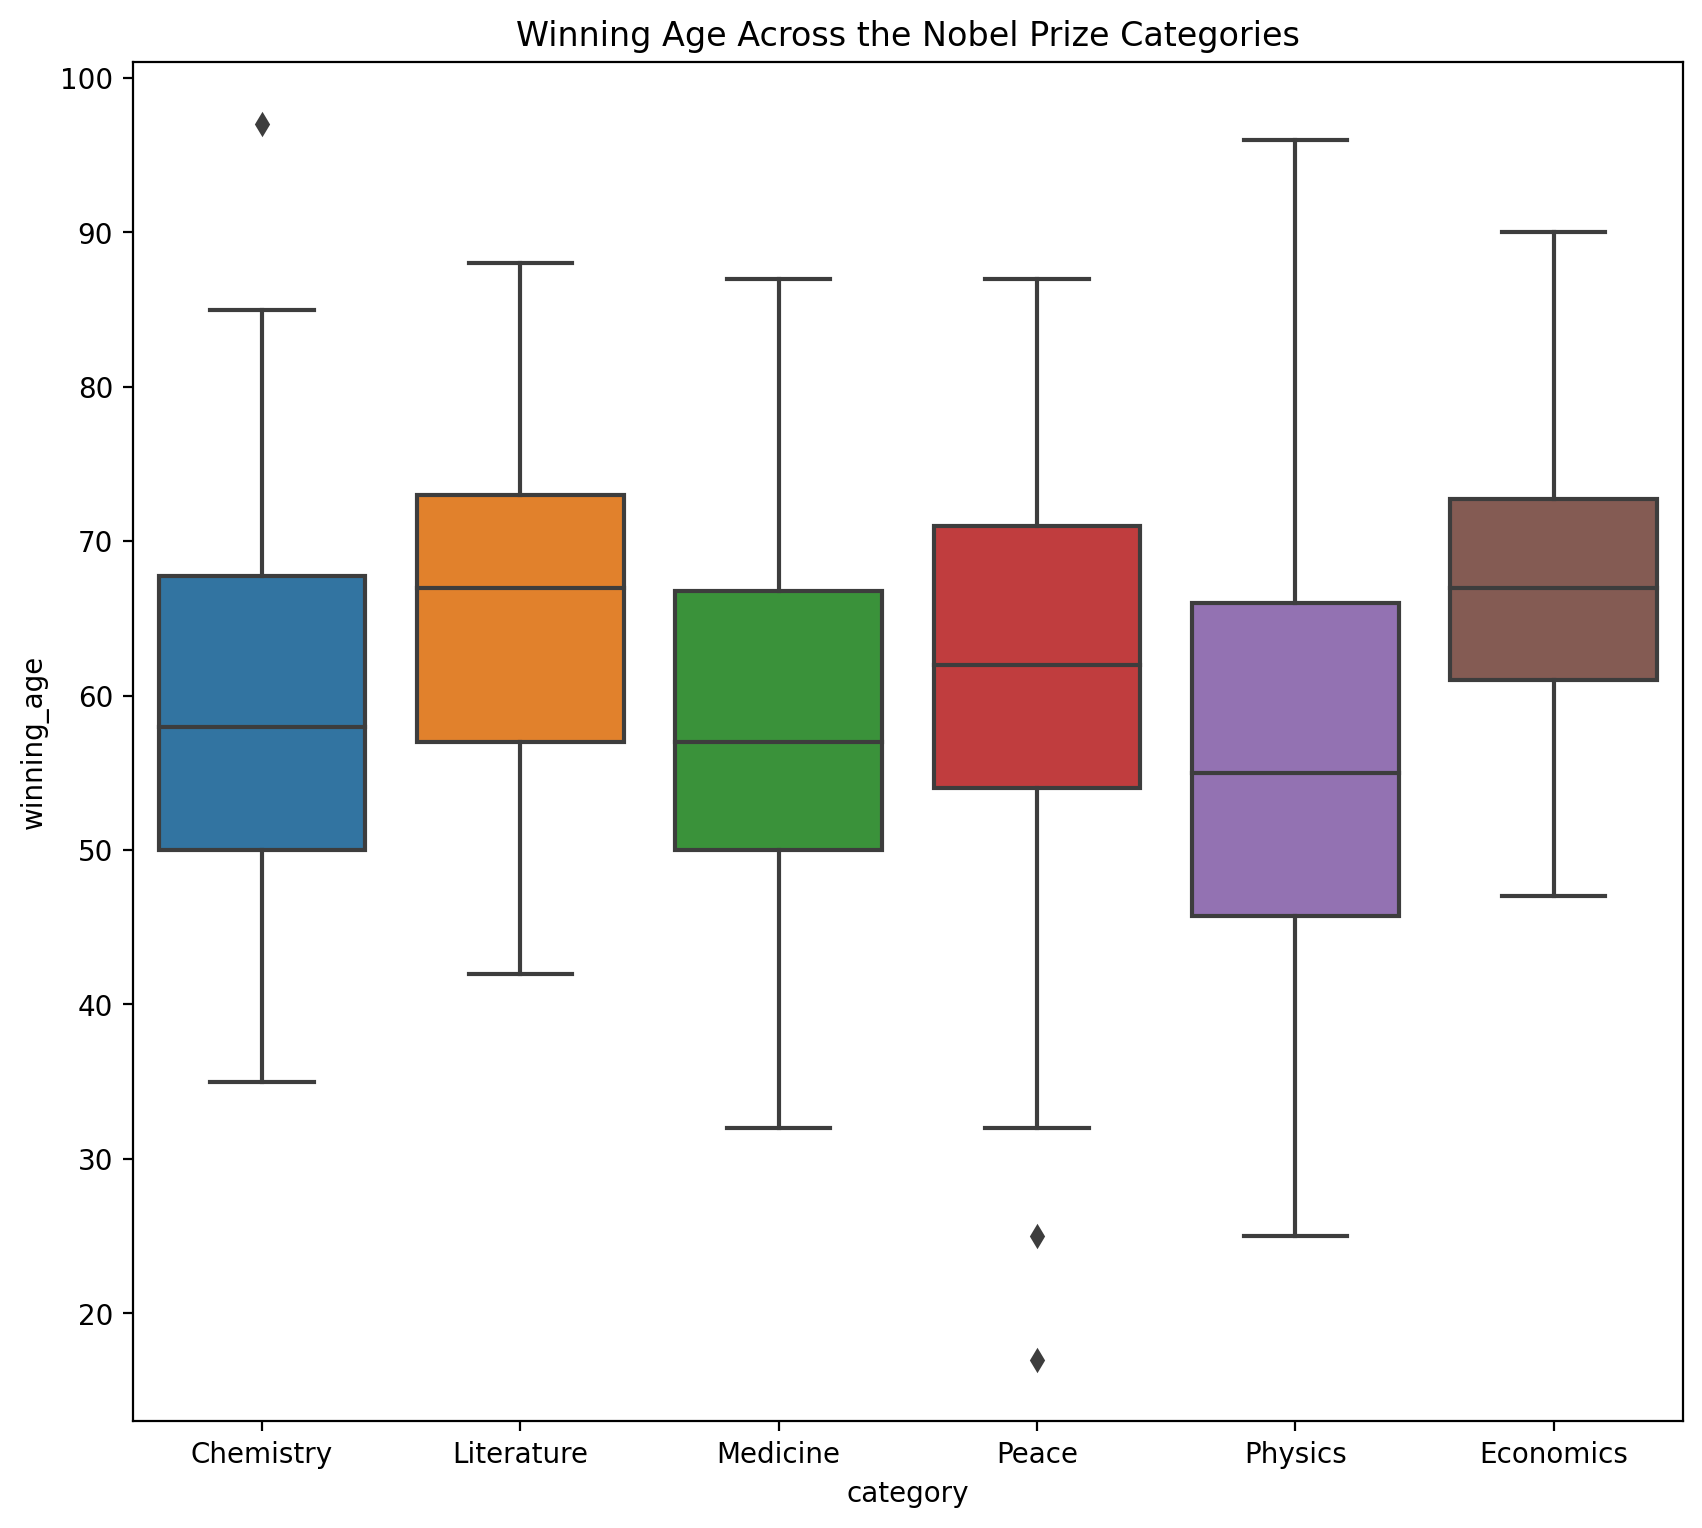

In [279]:
plt.figure(figsize=(10,9), dpi=200)
plt.title("Winning Age Across the Nobel Prize Categories")
plt.xlabel("Winning age")
plt.ylabel('Category')

sns.boxplot(data=df,
            x='category',
            y='winning_age')

plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


In [281]:
df.sample()

year category                            prize  \
716  2000  Physics  The Nobel Prize in Physics 2000   

                                            motivation prize_share  \
716  "for basic work on information and communicati...         1/4   

    laureate_type        full_name birth_date birth_city birth_country  \
716    Individual  Herbert Kroemer 1928-08-25     Weimar       Germany   

    birth_country_current   sex         organization_name  organization_city  \
716               Germany  Male  University of California  Santa Barbara, CA   

         organization_country  ISO  Percentage  winning_age  
716  United States of America  DEU        0.25        72.00

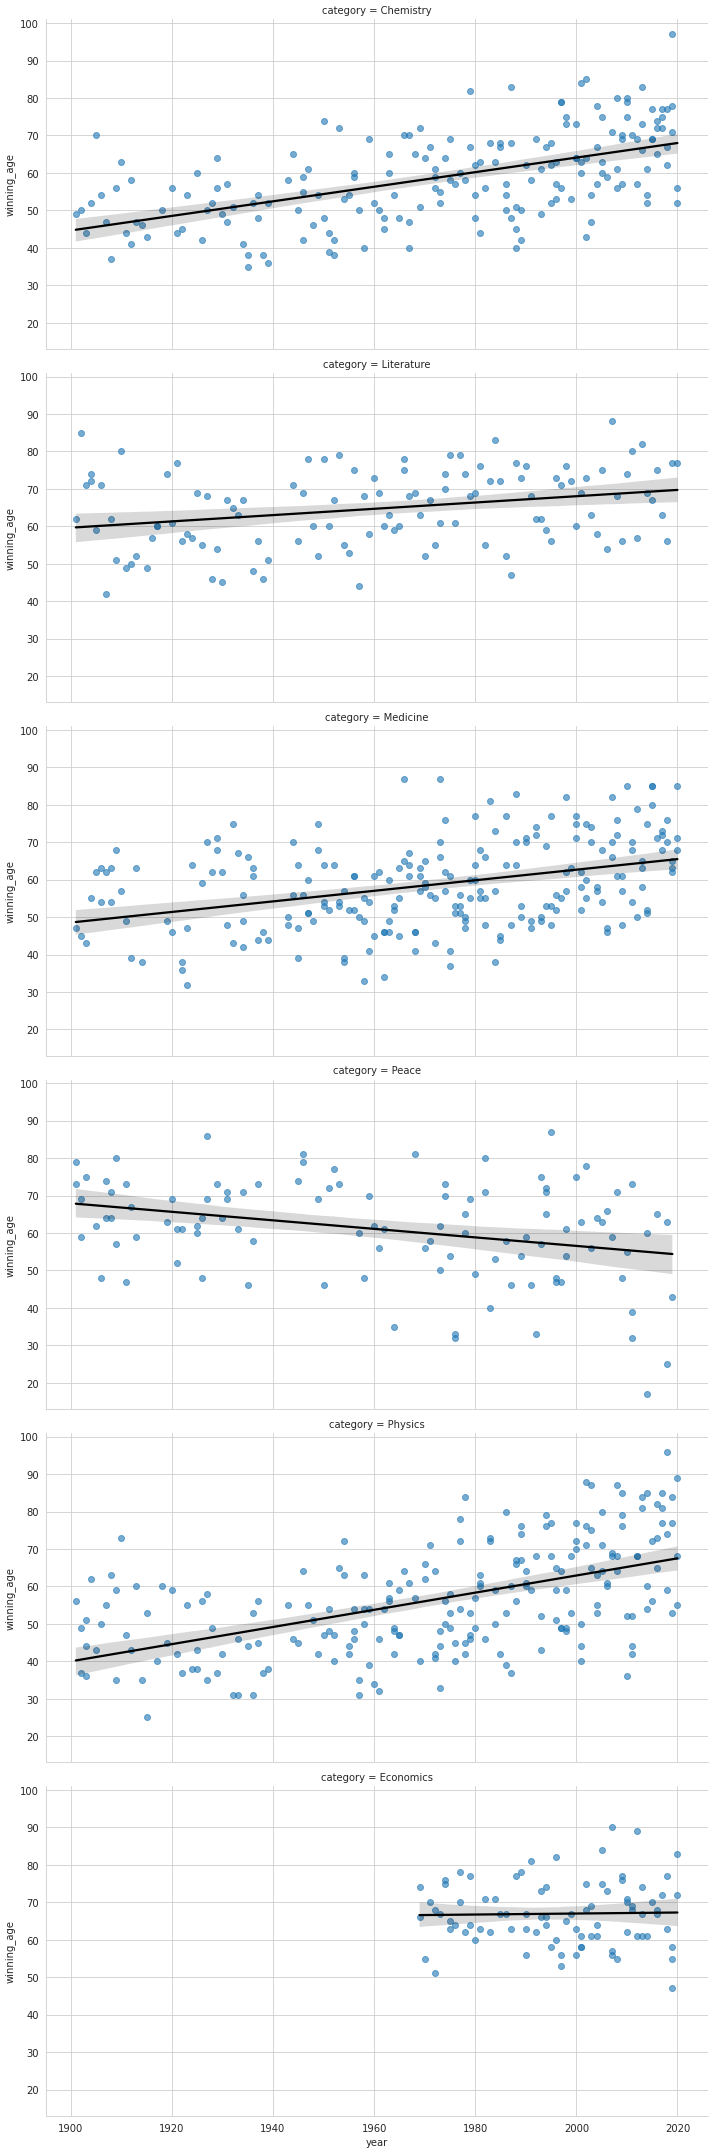

In [288]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df,
               x='year', 
               y='winning_age',
               row = 'category', 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

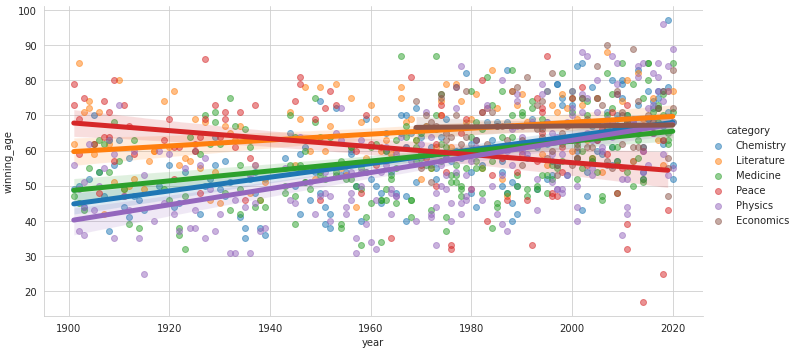

In [291]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df,
               x='year',
               y='winning_age',
               hue='category',
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()